# Network Intrusion Detection

Project 1                                                                                           
                                                                                                    Name: Meghana Dharmapuri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

training_df = pd.read_csv('UNSW_NB15_training-set_csc215.csv')
test_df = pd.read_csv('UNSW_NB15_test-set_csc215.csv')

In [2]:
training_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [3]:
test_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
#counting no of rows in training data to check if the file was imported properly
file = open("UNSW_NB15_training-set_csc215.csv")
numline = len(file.readlines())
print (numline)

175342


In [5]:
#Search for null values in training data to remove them later
training_df=pd.read_csv('UNSW_NB15_training-set_csc215.csv', na_values=['-','?'])
training_df[training_df.isnull().any(axis=1)]

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,NaN,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,NaN,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,NaN,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,NaN,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,NaN,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,NaN,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,NaN,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,NaN,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,NaN,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [6]:
# Remove the rows that have null values from the training data; how= any is the default 
training_df=training_df.dropna()

In [7]:
training_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [8]:
#Searching for null values in testing data
test_df=pd.read_csv('UNSW_NB15_test-set_csc215.csv', na_values=['-','?']) 
test_df[test_df.isnull().any(axis=1)]

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,NaN,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,NaN,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,NaN,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,NaN,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,NaN,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,NaN,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,NaN,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,NaN,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,NaN,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [9]:
#Remove the missing values from the test data 
test_df=test_df.dropna()
test_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
35,36,0.983874,tcp,http,FIN,10,8,816,1172,17.278635,...,1,2,0,0,1,1,3,0,Normal,0
40,41,1.535254,tcp,http,FIN,10,10,826,1266,12.375802,...,1,2,0,0,1,1,3,0,Normal,0
45,46,1.059359,tcp,http,FIN,10,8,830,1134,16.047441,...,1,1,0,0,1,3,1,0,Normal,0
49,50,0.990548,tcp,http,FIN,10,10,804,1414,19.181301,...,1,2,0,0,1,1,2,0,Normal,0
72,73,1.303518,tcp,http,FIN,12,8,898,1120,14.575939,...,1,1,0,0,1,2,1,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81462,81463,0.818276,tcp,http,FIN,60,14,68199,612,89.211954,...,1,2,0,0,1,1,1,0,Normal,0
81466,81467,0.825170,tcp,http,FIN,60,14,68199,612,88.466621,...,1,1,0,0,1,1,1,0,Normal,0
81518,81519,0.874942,tcp,http,FIN,60,14,68199,612,83.434101,...,1,2,0,0,1,1,2,0,Normal,0
81540,81541,0.740231,tcp,http,FIN,60,14,68199,612,98.617867,...,1,3,0,0,1,1,3,0,Normal,0


In [10]:
# removing duplicates from the code to avoid biased decisions
df_unique_training = training_df.drop_duplicates(keep='first', inplace=False)
df_unique_test = test_df.drop_duplicates(keep='first',inplace=False)

In [11]:
df_unique_training.shape

(81173, 45)

In [12]:
df_unique_test.shape

(35179, 45)

In [13]:
df_unique_training[:4]

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0


In [14]:
df_unique_test[:4]

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
35,36,0.983874,tcp,http,FIN,10,8,816,1172,17.278635,...,1,2,0,0,1,1,3,0,Normal,0
40,41,1.535254,tcp,http,FIN,10,10,826,1266,12.375802,...,1,2,0,0,1,1,3,0,Normal,0
45,46,1.059359,tcp,http,FIN,10,8,830,1134,16.047441,...,1,1,0,0,1,3,1,0,Normal,0
49,50,0.990548,tcp,http,FIN,10,10,804,1414,19.181301,...,1,2,0,0,1,1,2,0,Normal,0


In [15]:
y_binary_train = df_unique_training['label'].tolist()

In [16]:
y_binary_test = df_unique_test['label'].tolist()

In [17]:
# converting list to np array for further processing
y_binary_train = np.array(y_binary_train)

In [18]:
y_binary_test = np.array(y_binary_test)

In [19]:
y_binary_train

array([0, 0, 0, ..., 1, 1, 1])

In [20]:
y_binary_train.shape

(81173,)

In [21]:
y_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
y_binary_test.shape

(35179,)

In [23]:
df_unique_training.drop(columns='attack_cat', axis=1,inplace=True)

In [24]:
df_unique_test.drop(columns='attack_cat', axis=1,inplace=True)

In [25]:
#one hot encoding
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}_{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [26]:
df_unique_training.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,1,3,1,1,0,2,1,0,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,1,2,0,0,0,1,1,0,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,1,4,0,0,0,2,1,0,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,1,2,0,0,1,1,3,0,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,1,0,0,1,2,3,0,0


In [27]:
text_features=['proto','state','service','is_sm_ips_ports','is_ftp_login']

In [28]:
train_label = df_unique_training['label']
test_label = df_unique_test['label']

train_df = df_unique_training.iloc[:,df_unique_training.columns!='label']
test_df = df_unique_test.iloc[:,df_unique_test.columns!='label']

# one hot encoding

In [29]:
#performed one hot encoding
for name in text_features:
    encode_text_dummy(df_unique_training,name)
    encode_text_dummy(df_unique_test,name)

In [30]:
df=df_unique_training.copy()
df.columns

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'label', 'proto_tcp', 'proto_udp', 'state_CON',
       'state_FIN', 'state_INT', 'state_REQ', 'state_RST', 'service_dhcp',
       'service_dns', 'service_ftp', 'service_ftp-data', 'service_http',
       'service_irc', 'service_pop3', 'service_radius', 'service_smtp',
       'service_snmp', 'service_ssh', 'service_ssl', 'is_sm_ips_ports_0',
       'is_ftp_login_0', 'is_ftp_login_1', 'is_ftp_login_2', 'is_ftp_login_4'],
      dtype='object')

In [31]:
numerical_features=['spkts','dpkts','sbytes','dbytes','rate','sttl','dttl','sload','dload','sloss','dloss','sinpkt','dinpkt','sjit','djit','swin','stcpb','dtcpb','dwin','smean','dmean','trans_depth','response_body_len','ct_srv_src','ct_state_ttl','ct_dst_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','ct_ftp_cmd','ct_flw_http_mthd','ct_src_ltm','ct_srv_dst']

# Zscore normalisation

In [32]:
from scipy.stats import zscore
for name in numerical_features:
    df_unique_training[name]=zscore(df_unique_training[name])
    df_unique_test[name]=zscore(df_unique_test[name])

In [33]:
del df_unique_training['label']

In [34]:
del df_unique_training['id']

In [35]:
df.columns

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'label', 'proto_tcp', 'proto_udp', 'state_CON',
       'state_FIN', 'state_INT', 'state_REQ', 'state_RST', 'service_dhcp',
       'service_dns', 'service_ftp', 'service_ftp-data', 'service_http',
       'service_irc', 'service_pop3', 'service_radius', 'service_smtp',
       'service_snmp', 'service_ssh', 'service_ssl', 'is_sm_ips_ports_0',
       'is_ftp_login_0', 'is_ftp_login_1', 'is_ftp_login_2', 'is_ftp_login_4'],
      dtype='object')

# Feature Selection

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[9.76937799e-03 1.30703620e-03 1.48306973e-03 6.32445191e-03
 4.08727371e-03 1.45607625e-02 1.35280663e-01 1.75531910e-01
 5.13911674e-03 5.31453036e-02 1.57632791e-03 1.91260527e-03
 3.26860625e-03 3.05853268e-03 2.91344513e-03 3.27732033e-03
 5.33306737e-03 3.03855611e-03 2.89665578e-03 5.28157667e-03
 3.72850846e-02 1.82630164e-02 3.37157979e-03 4.74731427e-03
 4.19576207e-02 1.26097011e-03 1.63776032e-03 4.62473964e-02
 1.55095136e-01 2.12235773e-03 1.28763289e-03 1.81896000e-03
 5.99235204e-02 3.63511189e-04 1.43570224e-03 1.45575868e-02
 1.55869838e-02 1.37544713e-02 1.15155123e-02 4.16407651e-02
 1.88973952e-03 5.66329940e-02 2.00664196e-04 6.79112567e-05
 2.16698155e-04 4.93014822e-03 2.74290366e-03 1.08506719e-02
 2.02316864e-03 6.04589234e-07 1.22383659e-03 6.09400195e-05
 1.05524401e-03 3.98869049e-06 4.14813852e-03 2.57742613e-06
 0.00000000e+00 5.24112542e-04 3.57213483e-04 2.00573482e-06
 7.89738078e-06]


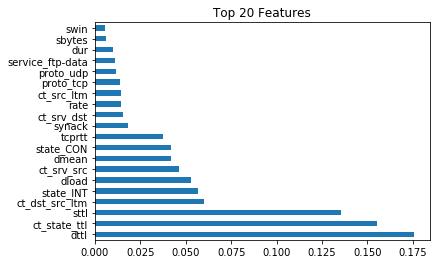

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
X = df_unique_training
y = train_label
tree_model = ExtraTreesClassifier()
tree_model.fit(X,y)
print(tree_model.feature_importances_)
feat_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', title='Top 20 Features')
cols_to_keep = feat_importances.nlargest(15).index.to_list()

In [37]:
df_unique_training = df_unique_training[cols_to_keep]
df_unique_training.columns

df_unique_test = df_unique_test[cols_to_keep]

In [38]:
x_train = df_unique_training.values.astype(np.float)
y_train = train_label.values.astype(np.float)

x_test = df_unique_test.values.astype(np.float)
y_test = test_label.values.astype(np.float)

x_train

array([[ 1.55459667, -0.34049134, -1.04253342, ..., -0.62412729,
        -0.85560881,  1.        ],
       [ 1.55459667, -0.34049134, -1.04253342, ..., -0.62395935,
        -0.95581012,  1.        ],
       [-0.71758686,  0.85155143,  0.82265124, ...,  2.28706345,
        -0.85560881,  0.        ],
       ...,
       [-0.71758686,  0.85155143,  0.82265124, ...,  0.02274202,
        -0.7554075 ,  0.        ],
       [-0.71758686,  0.85155143,  0.82265124, ...,  0.02274202,
         1.95002789,  0.        ],
       [-0.71758686,  0.85155143,  0.82265124, ...,  0.02274202,
         1.95002789,  0.        ]])

In [39]:
x_test.shape

(35179, 15)

In [40]:
y_train.shape

(81173,)

In [41]:
y_test.shape

(35179,)

In [42]:
scores = []
def addScores(name, acc, prec, rec, f1score):
    scores.append({"Name": name,
                   "Accuracy": acc,
                  "Precision": prec,
                  "Recall": rec,
                  "F1-Score": f1score})

# Logistic Regression

In [43]:
#logistic Regression

# import the class
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(x_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

test :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
pred :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
Accuracy of logistic regression classifier on test set: 0.93

[[ 7142  2483]
 [  155 25399]]



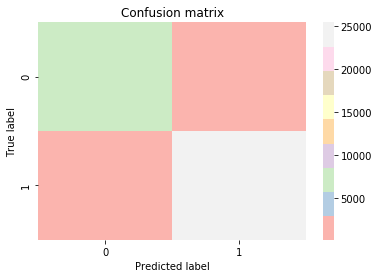


              precision    recall  f1-score   support

         0.0       0.98      0.74      0.84      9625
         1.0       0.91      0.99      0.95     25554

    accuracy                           0.93     35179
   macro avg       0.94      0.87      0.90     35179
weighted avg       0.93      0.93      0.92     35179



In [44]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred_lr = clf_lr.predict(x_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_lr[:10])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf_lr.score(x_test, y_test))) 
print()

cm= confusion_matrix(y_test, y_pred_lr)
print(cm)

print()

ax = sns.heatmap(cm, cmap="Pastel1", yticklabels=True)
ax.set_title('Confusion matrix')
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
plt.show()

print()

print(classification_report(y_test, y_pred_lr))

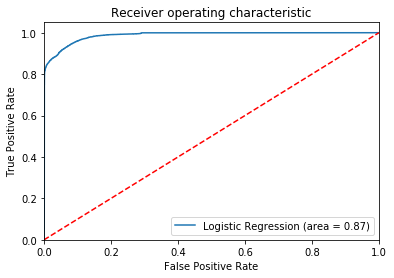

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf_lr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [46]:
x_kNN=x_train[0:50000]
y_kNN=y_train[0:50000]

# KNN classifier

In [47]:
#knn classfrom sklearn.neighbors import KNeighborsClassifierifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

Accuracy of nearest neighbor classifier on test set: 0.93

Confusion Matrix is :
 [[ 7877  1748]
 [  872 24682]]


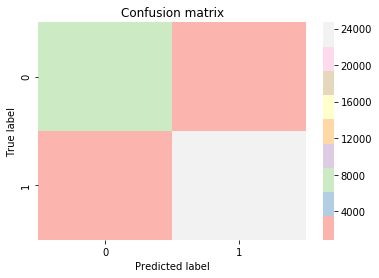

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.90      0.82      0.86      9625
         1.0       0.93      0.97      0.95     25554

    accuracy                           0.93     35179
   macro avg       0.92      0.89      0.90     35179
weighted avg       0.92      0.93      0.92     35179



In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


print('Accuracy of nearest neighbor classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))

cm = confusion_matrix(y_test, y_pred_knn)
print('\nConfusion Matrix is :\n',cm)

ax = sns.heatmap(cm, cmap="Pastel1", yticklabels=True)
ax.set_title('Confusion matrix')
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
plt.show()


print("Classification Report is:\n",classification_report(y_test, y_pred_knn))

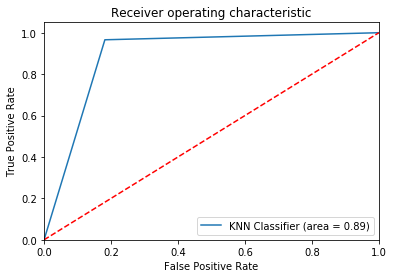

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN Classifier (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

# Support Vector Machine

In [50]:
from sklearn.svm import SVC

clf = SVC(probability=True)
clf.fit(x_train,y_train)
y_pred_svm=clf.predict(x_test)

E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM on test set: 0.92
Confusion Matrix is :
 [[ 6828  2797]
 [    4 25550]]


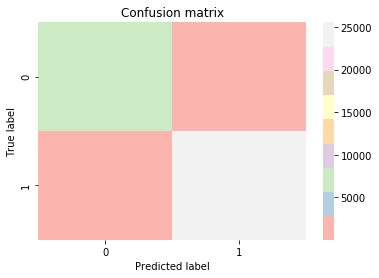

Classification Report is:
               precision    recall  f1-score   support

         0.0       1.00      0.71      0.83      9625
         1.0       0.90      1.00      0.95     25554

    accuracy                           0.92     35179
   macro avg       0.95      0.85      0.89     35179
weighted avg       0.93      0.92      0.92     35179



In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


print('Accuracy of SVM on test set: {:.2f}'.format(clf.score(x_test, y_test)))

cm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix is :\n',cm)

ax = sns.heatmap(cm, cmap="Pastel1", yticklabels=True)
ax.set_title('Confusion matrix')
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
plt.show()

print("Classification Report is:\n",classification_report(y_test, y_pred_svm))

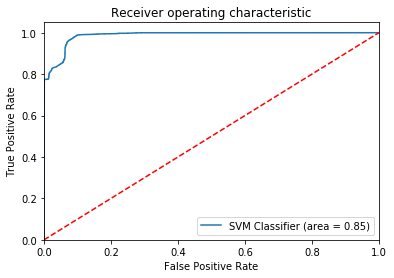

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
svm_roc_auc = roc_auc_score(y_test, clf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM Classifier (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

# Neural Network 

# Activation = relu and optimizer = adam

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(Dense(60, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
                        verbose=2, mode='min')

chckpt = ModelCheckpoint(filepath='.weights.hdf5', verbose=1, save_best_only=True)

model.fit(x_train,y_train,verbose=2,epochs=200, batch_size=20, 
          callbacks=[monitor, chckpt], validation_split=0.25)

Train on 60879 samples, validate on 20294 samples
Epoch 1/200

Epoch 00001: val_loss improved from inf to 0.00705, saving model to .weights.hdf5
60879/60879 - 10s - loss: 0.0902 - accuracy: 0.9685 - val_loss: 0.0070 - val_accuracy: 0.9999
Epoch 2/200

Epoch 00002: val_loss improved from 0.00705 to 0.00508, saving model to .weights.hdf5
60879/60879 - 8s - loss: 0.0683 - accuracy: 0.9735 - val_loss: 0.0051 - val_accuracy: 0.9992
Epoch 3/200

Epoch 00003: val_loss did not improve from 0.00508
60879/60879 - 8s - loss: 0.0647 - accuracy: 0.9746 - val_loss: 0.0088 - val_accuracy: 0.9956
Epoch 4/200

Epoch 00004: val_loss did not improve from 0.00508
60879/60879 - 8s - loss: 0.0628 - accuracy: 0.9750 - val_loss: 0.0069 - val_accuracy: 0.9975
Epoch 5/200

Epoch 00005: val_loss improved from 0.00508 to 0.00233, saving model to .weights.hdf5
60879/60879 - 9s - loss: 0.0615 - accuracy: 0.9749 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 6/200

Epoch 00006: val_loss did not improve from 0.00233

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 35)                2135      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 36        
Total params: 3,131
Trainable params: 3,131
Non-trainable params: 0
_________________________________________________________________


In [55]:
y_pred = model.predict(x_test)
y_pred

array([[0.47146335],
       [0.47452492],
       [0.75138783],
       ...,
       [0.5239845 ],
       [0.53092796],
       [0.52127475]], dtype=float32)

In [56]:
#from the y_pred, we will only be considering the one's greater than 0.5
argmax = []
for val in y_pred:
    if val >= 0.5:
      argmax.append(1)
    else:
        argmax.append(0)
argmax[:10]

[0, 0, 1, 0, 1, 1, 0, 1, 1, 1]

In [57]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=argmax)
conf_mat

array([[ 7300,  2325],
       [  130, 25424]], dtype=int64)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b0b50873c8>)

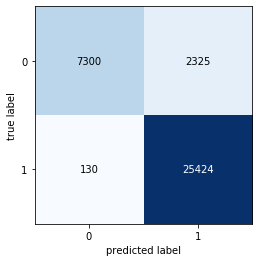

In [58]:
from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions
#from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(conf_mat=conf_mat)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, f1_score, recall_score
acc = accuracy_score(y_true=y_test, y_pred=argmax)
acc

0.9302140481537281

In [60]:
print(classification_report(y_true=y_test, y_pred=argmax))

              precision    recall  f1-score   support

         0.0       0.98      0.76      0.86      9625
         1.0       0.92      0.99      0.95     25554

    accuracy                           0.93     35179
   macro avg       0.95      0.88      0.90     35179
weighted avg       0.93      0.93      0.93     35179



In [61]:
fpr, tpr, _ = roc_curve(y_test, argmax)
tpr

array([0.        , 0.99491273, 1.        ])

In [62]:
auc = roc_auc_score(y_test, argmax)

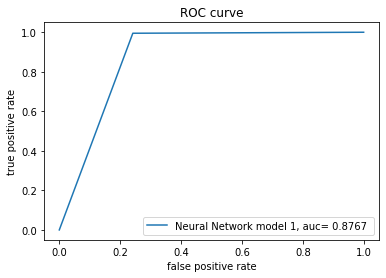

In [63]:
def plot_roc(fpr, tpr, label):
    plt.plot(fpr, tpr, label=label)
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.title("ROC curve")
    plt.legend(loc=4)
plot_roc(fpr, tpr, "Neural Network model 1, auc= %.4f " % auc)

# Activation = relu and optimizer = sgd

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model2 = Sequential()
model2.add(Dense(60, input_dim=x_train.shape[1], activation='relu'))
model2.add(Dense(35, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
                        verbose=2, mode='min')

chckpt = ModelCheckpoint(filepath='.weights.hdf5', verbose=1, save_best_only=True)

model2.fit(x_train,y_train,verbose=2,epochs=200, batch_size=20, 
          callbacks=[monitor, chckpt], validation_split=0.25)

Train on 60879 samples, validate on 20294 samples
Epoch 1/200

Epoch 00001: val_loss improved from inf to 0.00983, saving model to .weights.hdf5
60879/60879 - 10s - loss: 0.1235 - accuracy: 0.9666 - val_loss: 0.0098 - val_accuracy: 0.9999
Epoch 2/200

Epoch 00002: val_loss improved from 0.00983 to 0.00661, saving model to .weights.hdf5
60879/60879 - 8s - loss: 0.0902 - accuracy: 0.9708 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 3/200

Epoch 00003: val_loss did not improve from 0.00661
60879/60879 - 8s - loss: 0.0858 - accuracy: 0.9711 - val_loss: 0.0078 - val_accuracy: 0.9999
Epoch 4/200

Epoch 00004: val_loss did not improve from 0.00661
60879/60879 - 7s - loss: 0.0825 - accuracy: 0.9713 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 5/200

Epoch 00005: val_loss did not improve from 0.00661
60879/60879 - 8s - loss: 0.0801 - accuracy: 0.9717 - val_loss: 0.0086 - val_accuracy: 0.9997
Epoch 6/200

Epoch 00006: val_loss improved from 0.00661 to 0.00608, saving model to .weights.hdf5

In [65]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 60)                960       
_________________________________________________________________
dense_4 (Dense)              (None, 35)                2135      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 36        
Total params: 3,131
Trainable params: 3,131
Non-trainable params: 0
_________________________________________________________________


In [66]:
y_pred = model2.predict(x_test)
y_pred

array([[0.5093567 ],
       [0.48874387],
       [0.67013556],
       ...,
       [0.8493742 ],
       [0.8235889 ],
       [0.85223603]], dtype=float32)

In [67]:
argmax = []
for val in y_pred:
    if val >= 0.5:
      argmax.append(1)
    else:
        argmax.append(0)
argmax[:10]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [68]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=argmax)
conf_mat

array([[ 7181,  2444],
       [   33, 25521]], dtype=int64)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b0b9291a88>)

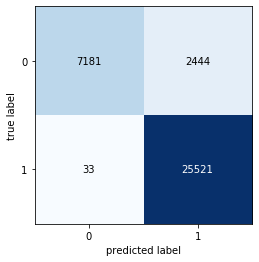

In [69]:
plot_confusion_matrix(conf_mat=conf_mat)

In [70]:
acc = accuracy_score(y_true=y_test, y_pred=argmax)
acc

0.9295886750618266

In [71]:
print(classification_report(y_true=y_test, y_pred=argmax))

              precision    recall  f1-score   support

         0.0       1.00      0.75      0.85      9625
         1.0       0.91      1.00      0.95     25554

    accuracy                           0.93     35179
   macro avg       0.95      0.87      0.90     35179
weighted avg       0.94      0.93      0.93     35179



In [72]:
fpr, tpr, _ = roc_curve(y_test, argmax)
tpr

array([0.        , 0.99870862, 1.        ])

In [73]:
auc = roc_auc_score(y_test, argmax)

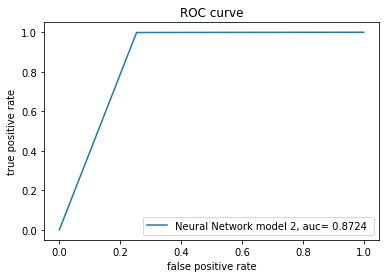

In [75]:
def plot_roc(fpr, tpr, label):
    plt.plot(fpr, tpr, label=label)
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.title("ROC curve")
    plt.legend(loc=4)
plot_roc(fpr, tpr, "Neural Network model 2, auc= %.4f " % auc)

In [76]:
addScores("Neural Netwrk model 2",acc, precision_score(y_test, argmax), 
          recall_score(y_test, argmax), f1_score(y_test, argmax))

# Activation = tanh and optimizer = adam

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model3 = Sequential()
model3.add(Dense(60, input_dim=x_train.shape[1], activation='tanh'))
model3.add(Dense(50, activation='tanh'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
                        verbose=2, mode='min')

chckpt = ModelCheckpoint(filepath='.weights.hdf5', verbose=1, save_best_only=True)

model3.fit(x_train,y_train,verbose=2,epochs=200, batch_size=20, 
          callbacks=[monitor, chckpt], validation_split=0.25)

Train on 60879 samples, validate on 20294 samples
Epoch 1/200

Epoch 00001: val_loss improved from inf to 0.00461, saving model to .weights.hdf5
60879/60879 - 9s - loss: 0.0969 - accuracy: 0.9687 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 2/200

Epoch 00002: val_loss did not improve from 0.00461
60879/60879 - 9s - loss: 0.0785 - accuracy: 0.9719 - val_loss: 0.0093 - val_accuracy: 0.9989
Epoch 3/200

Epoch 00003: val_loss did not improve from 0.00461
60879/60879 - 8s - loss: 0.0680 - accuracy: 0.9735 - val_loss: 0.0054 - val_accuracy: 0.9997
Epoch 4/200

Epoch 00004: val_loss did not improve from 0.00461
60879/60879 - 8s - loss: 0.0645 - accuracy: 0.9746 - val_loss: 0.0076 - val_accuracy: 0.9971
Epoch 5/200

Epoch 00005: val_loss did not improve from 0.00461
60879/60879 - 8s - loss: 0.0630 - accuracy: 0.9748 - val_loss: 0.0068 - val_accuracy: 0.9975
Epoch 6/200

Epoch 00006: val_loss did not improve from 0.00461
60879/60879 - 8s - loss: 0.0619 - accuracy: 0.9752 - val_loss: 0.0102 

In [78]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 60)                960       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                3050      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 4,061
Trainable params: 4,061
Non-trainable params: 0
_________________________________________________________________


In [79]:
y_pred = model3.predict(x_test)
y_pred

array([[0.5277672 ],
       [0.42597076],
       [0.49078646],
       ...,
       [0.4289477 ],
       [0.44509563],
       [0.38921827]], dtype=float32)

In [80]:
argmax = []
for val in y_pred:
    if val >= 0.5:
      argmax.append(1)
    else:
        argmax.append(0)
argmax[:10]

[1, 0, 0, 0, 0, 0, 0, 1, 1, 1]

In [81]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=argmax)
conf_mat

array([[ 7907,  1718],
       [  992, 24562]], dtype=int64)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b0b66118c8>)

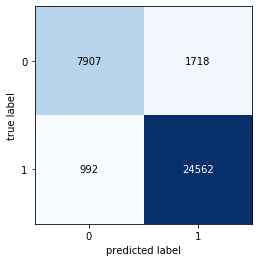

In [82]:
plot_confusion_matrix(conf_mat=conf_mat)

In [83]:
acc = accuracy_score(y_true=y_test, y_pred=argmax)
acc

0.922965405497598

In [84]:
print(classification_report(y_true=y_test, y_pred=argmax))

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85      9625
         1.0       0.93      0.96      0.95     25554

    accuracy                           0.92     35179
   macro avg       0.91      0.89      0.90     35179
weighted avg       0.92      0.92      0.92     35179



In [85]:
fpr, tpr, _ = roc_curve(y_test, argmax)
tpr

array([0.        , 0.96118025, 1.        ])

In [86]:
auc = roc_auc_score(y_test, argmax)

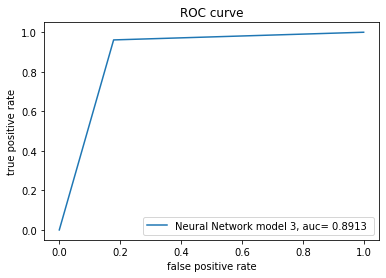

In [89]:
def plot_roc(fpr, tpr, label):
    plt.plot(fpr, tpr, label=label)
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.title("ROC curve")
    plt.legend(loc=4)
plot_roc(fpr, tpr, "Neural Network model 3, auc= %.4f " % auc)

In [90]:
addScores("Neural Network model 3",acc, precision_score(y_test, argmax), 
          recall_score(y_test, argmax), f1_score(y_test, argmax))

# Activation = tanh and optimizer = sgd

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model4 = Sequential()
model4.add(Dense(60, input_dim=x_train.shape[1], activation='tanh'))
model4.add(Dense(50, activation='tanh'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
                        verbose=2, mode='min')

chckpt = ModelCheckpoint(filepath='.weights.hdf5', verbose=1, save_best_only=True)

model4.fit(x_train,y_train,verbose=2,epochs=200, batch_size=20, 
          callbacks=[monitor, chckpt], validation_split=0.25)

Train on 60879 samples, validate on 20294 samples
Epoch 1/200

Epoch 00001: val_loss improved from inf to 0.01105, saving model to .weights.hdf5
60879/60879 - 9s - loss: 0.1277 - accuracy: 0.9649 - val_loss: 0.0111 - val_accuracy: 0.9999
Epoch 2/200

Epoch 00002: val_loss improved from 0.01105 to 0.00925, saving model to .weights.hdf5
60879/60879 - 7s - loss: 0.0998 - accuracy: 0.9703 - val_loss: 0.0092 - val_accuracy: 0.9999
Epoch 3/200

Epoch 00003: val_loss improved from 0.00925 to 0.00850, saving model to .weights.hdf5
60879/60879 - 8s - loss: 0.0947 - accuracy: 0.9702 - val_loss: 0.0085 - val_accuracy: 0.9999
Epoch 4/200

Epoch 00004: val_loss improved from 0.00850 to 0.00722, saving model to .weights.hdf5
60879/60879 - 7s - loss: 0.0906 - accuracy: 0.9702 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 5/200

Epoch 00005: val_loss did not improve from 0.00722
60879/60879 - 7s - loss: 0.0872 - accuracy: 0.9706 - val_loss: 0.0078 - val_accuracy: 0.9999
Epoch 6/200

Epoch 00006: val

In [92]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 60)                960       
_________________________________________________________________
dense_10 (Dense)             (None, 50)                3050      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 4,061
Trainable params: 4,061
Non-trainable params: 0
_________________________________________________________________


In [93]:
y_pred = model4.predict(x_test)
y_pred

array([[0.40554205],
       [0.41378686],
       [0.64302236],
       ...,
       [0.8103372 ],
       [0.761825  ],
       [0.83741117]], dtype=float32)

In [94]:
argmax = []
for val in y_pred:
    if val >= 0.5:
      argmax.append(1)
    else:
        argmax.append(0)
argmax[:10]

[0, 0, 1, 1, 1, 1, 1, 0, 1, 0]

In [95]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=argmax)
conf_mat

array([[ 8314,  1311],
       [  103, 25451]], dtype=int64)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b0baadc8c8>)

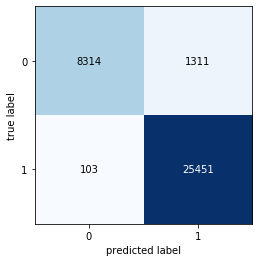

In [96]:
plot_confusion_matrix(conf_mat=conf_mat)

In [97]:
acc = accuracy_score(y_true=y_test, y_pred=argmax)
acc

0.9598055658205179

In [98]:
print(classification_report(y_true=y_test, y_pred=argmax))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      9625
         1.0       0.95      1.00      0.97     25554

    accuracy                           0.96     35179
   macro avg       0.97      0.93      0.95     35179
weighted avg       0.96      0.96      0.96     35179



In [99]:
fpr, tpr, _ = roc_curve(y_test, argmax)
tpr

array([0.        , 0.99596932, 1.        ])

In [100]:
auc = roc_auc_score(y_test, argmax)

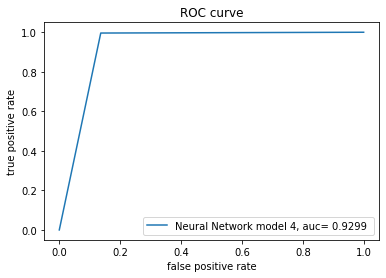

In [102]:
def plot_roc(fpr, tpr, label):
    plt.plot(fpr, tpr, label=label)
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.title("ROC curve")
    plt.legend(loc=4)
plot_roc(fpr, tpr, "Neural Network model 4, auc= %.4f " % auc)

In [103]:
addScores("Neural Network model 4",acc, precision_score(y_test, argmax), 
          recall_score(y_test, argmax), f1_score(y_test, argmax))

# Manipulating the no of neurons and no of layers for the best model so far Activation = tanh and optimizer = sgd

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model5 = Sequential()
model5.add(Dense(50, input_dim=x_train.shape[1], activation='tanh'))
#model5.add(Dense(50, activation='tanh'))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
                        verbose=2, mode='min')

chckpt = ModelCheckpoint(filepath='.weights.hdf5', verbose=1, save_best_only=True)

model5.fit(x_train,y_train,verbose=2,epochs=200, batch_size=20, 
          callbacks=[monitor, chckpt], validation_split=0.25)

Train on 60879 samples, validate on 20294 samples
Epoch 1/200

Epoch 00001: val_loss improved from inf to 0.01236, saving model to .weights.hdf5
60879/60879 - 9s - loss: 0.1398 - accuracy: 0.9631 - val_loss: 0.0124 - val_accuracy: 0.9999
Epoch 2/200

Epoch 00002: val_loss improved from 0.01236 to 0.01091, saving model to .weights.hdf5
60879/60879 - 10s - loss: 0.1048 - accuracy: 0.9702 - val_loss: 0.0109 - val_accuracy: 0.9998
Epoch 3/200

Epoch 00003: val_loss improved from 0.01091 to 0.00969, saving model to .weights.hdf5
60879/60879 - 8s - loss: 0.1013 - accuracy: 0.9701 - val_loss: 0.0097 - val_accuracy: 0.9998
Epoch 4/200

Epoch 00004: val_loss improved from 0.00969 to 0.00930, saving model to .weights.hdf5
60879/60879 - 8s - loss: 0.0990 - accuracy: 0.9701 - val_loss: 0.0093 - val_accuracy: 0.9998
Epoch 5/200

Epoch 00005: val_loss did not improve from 0.00930
60879/60879 - 8s - loss: 0.0969 - accuracy: 0.9701 - val_loss: 0.0093 - val_accuracy: 0.9998
Epoch 6/200

Epoch 00006: va

Epoch 50/200

Epoch 00050: val_loss did not improve from 0.00484
60879/60879 - 8s - loss: 0.0764 - accuracy: 0.9727 - val_loss: 0.0062 - val_accuracy: 0.9995
Epoch 51/200

Epoch 00051: val_loss did not improve from 0.00484
60879/60879 - 8s - loss: 0.0762 - accuracy: 0.9727 - val_loss: 0.0067 - val_accuracy: 0.9995
Epoch 52/200

Epoch 00052: val_loss did not improve from 0.00484
60879/60879 - 8s - loss: 0.0761 - accuracy: 0.9728 - val_loss: 0.0086 - val_accuracy: 0.9992
Epoch 53/200

Epoch 00053: val_loss did not improve from 0.00484
60879/60879 - 8s - loss: 0.0758 - accuracy: 0.9727 - val_loss: 0.0076 - val_accuracy: 0.9992
Epoch 54/200

Epoch 00054: val_loss did not improve from 0.00484
60879/60879 - 8s - loss: 0.0757 - accuracy: 0.9727 - val_loss: 0.0069 - val_accuracy: 0.9994
Epoch 55/200

Epoch 00055: val_loss did not improve from 0.00484
60879/60879 - 8s - loss: 0.0755 - accuracy: 0.9729 - val_loss: 0.0063 - val_accuracy: 0.9994
Epoch 56/200

Epoch 00056: val_loss improved from 0.

In [105]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 50)                800       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


In [106]:
y_pred = model5.predict(x_test)
y_pred

array([[0.47298813],
       [0.48625866],
       [0.6741682 ],
       ...,
       [0.81445324],
       [0.7671699 ],
       [0.812797  ]], dtype=float32)

In [107]:
argmax = []
for val in y_pred:
    if val >= 0.5:
      argmax.append(1)
    else:
        argmax.append(0)
argmax[:10]

[0, 0, 1, 1, 1, 1, 1, 0, 1, 0]

In [108]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=argmax)
conf_mat

array([[ 8128,  1497],
       [   72, 25482]], dtype=int64)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b0b99e4c88>)

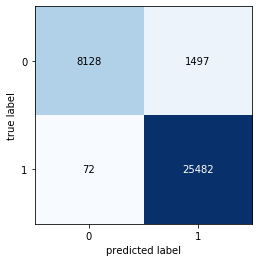

In [109]:
plot_confusion_matrix(conf_mat=conf_mat)

In [110]:
acc = accuracy_score(y_true=y_test, y_pred=argmax)
acc

0.9553995281275761

In [111]:
print(classification_report(y_true=y_test, y_pred=argmax))

              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91      9625
         1.0       0.94      1.00      0.97     25554

    accuracy                           0.96     35179
   macro avg       0.97      0.92      0.94     35179
weighted avg       0.96      0.96      0.95     35179

